<a href="https://colab.research.google.com/github/cesarespgar/IntroKeras/blob/master/PasantiaIntroKeras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
%cd '/content/drive/My Drive/Colab Notebooks'

/content/drive/My Drive/Colab Notebooks


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD

In [ ]:
datos = pd.read_csv('dataset.csv', sep=",", skiprows=32, usecols=[2,3])
x = datos['Age'].values
y = datos['Systolic blood pressure'].values

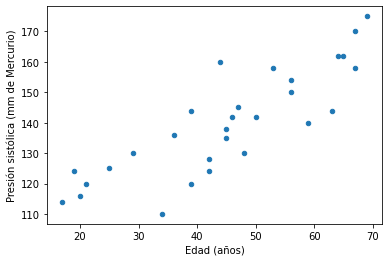

In [ ]:
datos.plot.scatter(x='Age', y='Systolic blood pressure')
plt.xlabel('Edad (años)')
plt.ylabel('Presión sistólica (mm de Mercurio)')
plt.show()

In [ ]:
print(datos)

    Age  Systolic blood pressure
0    39                      144
1    45                      138
2    47                      145
3    65                      162
4    46                      142
5    67                      170
6    42                      124
7    67                      158
8    56                      154
9    64                      162
10   56                      150
11   59                      140
12   34                      110
13   42                      128
14   48                      130
15   45                      135
16   17                      114
17   20                      116
18   19                      124
19   36                      136
20   50                      142
21   39                      120
22   21                      120
23   44                      160
24   53                      158
25   63                      144
26   29                      130
27   25                      125
28   69                      175


In [ ]:
#creando contenedor con Sequential para ingresar todos los elementos

#   np.random.seed(2) permite replicar resultados de la implementacion en 
  #   distintas PC's, los parámetros del modelo se se inician de forma aleatoria
    #   pero con los mismo valores


In [ ]:
# Dense() para especificar que tipo de Red o Regresion usaremos; requiere de 3 parms:
  # output_dim: tamaño de datos de salida, para el ejm. la dim. = 1 por ser valor numérico
  # input_dim: tamaño de datos de entrada, para el ejm. es la edad => dim = 1
  # activation: define la funcion de activacion a usar (Lineal, Log, Red, etc.)
np.random.seed(2)

input_dim = 1
output_dim = 1
modelo = Sequential()

modelo.add(Dense(output_dim, input_dim=input_dim, activation='linear'))

In [ ]:
## usando SGD(Stochastinc Gradient Descent):
# especificando forma de càlculo de parámetro de la linea recta (m, b)

# creando instancia SGD con tasa de aprendizaje (lr) = 0.0004:

sgd = SGD(learning_rate= 0.0004)

In [ ]:
# enlazando objeto con modelo:

  # 'mse' = mean squared error
modelo.compile(loss='mse', optimizer=sgd)

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# entrenando el modelo con 'fit' (requiere por lo menos 3 parms de entrada):
  # epochs: número de iteraciones que se usaran en el entrenamiento
  # batch_size: cantidad de datos a usar en cada iteración (cuando datos son miles o millones+ es mejor usar batch_size pequeño por memoria de pc)
  # verbose: para observar en pantalla los resultados del entrenamiento x iteracion (0,1,2)

num_epochs = 40000
batch_size = x.shape[0]
  
historia = modelo.fit(x, y, epochs=num_epochs, batch_size=batch_size, verbose=1)

Streaming output truncated to the last 5000 lines.
Epoch 37501/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1401
Epoch 37502/40000
1/1 [==============================] - 0s 3ms/step - loss: 87.1397
Epoch 37503/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1394
Epoch 37504/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1390
Epoch 37505/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1388
Epoch 37506/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1384
Epoch 37507/40000
1/1 [==============================] - 0s 5ms/step - loss: 87.1381
Epoch 37508/40000
1/1 [==============================] - 0s 5ms/step - loss: 87.1377
Epoch 37509/40000
1/1 [==============================] - 0s 8ms/step - loss: 87.1374
Epoch 37510/40000
1/1 [==============================] - 0s 12ms/step - loss: 87.1371
Epoch 37511/40000
1/1 [==============================] - 0s 4ms/step - loss: 87.1368
Epoch 37512/4

In [ ]:
# Imprimiendo pendiente a intercepto:

capas = modelo.layers[0]

w, b = capas.get_weights()

print('Parámetros: w = {:.1f}, b = {:.1f}'.format(w[0][0],b[0]))

Parámetros: w = 1.0, b = 93.5


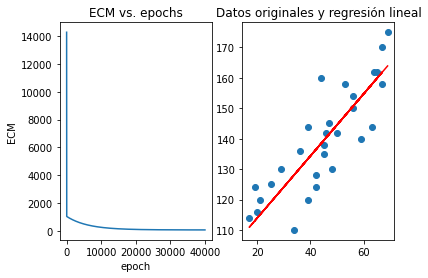

In [ ]:
# Graficando el resultado de la regresión:
plt.subplot(1,2,1)
plt.plot(historia.history['loss'])
plt.xlabel('epoch')
plt.ylabel('ECM')
plt.title('ECM vs. epochs')

y_regr = modelo.predict(x)
plt.subplot(1, 2, 2)
plt.scatter(x,y)
plt.plot(x,y_regr,'r')
plt.title('Datos originales y regresión lineal')
plt.show()

In [ ]:
# Prediciendo:
x_pred = np.array([90])
y_pred = modelo.predict(x_pred)

print("La presión sanguínea será de {:.1f} mm-Hg".format(y_pred[0][0]), " para una persona de {} años".format(x_pred[0]))

La presión sanguínea será de 185.3 mm-Hg  para una persona de 90 años
